<a href="https://colab.research.google.com/github/H-y-hoon/2021_School_Seminar/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn
from matplotlib import font_manager, rc 

font_name=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name) 

In [ ]:
df_train = pd.read_csv("C:/users/yhg31/OneDrive/바탕 화면/데이터파일/2021 학술제 데이터/Subject_D.csv")
df_test = pd.read_csv("C:/users/yhg31/OneDrive/바탕 화면/데이터파일/2021 학술제 데이터/Subject_D_testset.csv")

In [ ]:
df_train

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
0,1,3566.375438,2062.665095,1.040973,2.574824,1.376404,1.657806,0.933377,2.429998,3564.653552,...,0.991871,1.800747,3564.807696,2061.398768,1.839022,2.917284,1.095649,1.342387,1.141837,1.820216
1,1,3565.986713,2061.826341,1.347088,2.154989,0.904145,2.603965,1.175508,2.292886,3564.071577,...,0.852802,1.620589,3565.004893,2061.989687,1.314281,2.876174,1.178849,1.939520,0.903631,2.145510
2,1,3566.977885,2062.639807,1.083747,2.186981,1.155864,2.293261,1.144330,2.107225,3564.207493,...,1.075723,1.422287,3567.117563,2061.465328,1.628649,2.286765,1.591144,1.949241,1.006042,2.228659
3,1,3566.342634,2063.069909,1.208843,2.160716,1.143995,2.283394,1.008707,2.047132,3564.536023,...,0.696173,1.416980,3565.482402,2060.885464,1.049679,2.486281,0.684482,2.173874,0.937085,2.165614
4,1,3567.798629,2062.549327,1.378424,3.255706,0.795261,1.726990,0.914162,1.746653,3565.157175,...,0.743514,1.384104,3566.585859,2061.257282,1.500156,3.115490,1.235855,2.453826,0.840093,2.126146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0,3572.039773,2063.907536,0.673535,1.501734,0.728697,3.193993,1.032987,3.314444,3563.739031,...,0.916354,2.090869,3569.752044,2062.839766,1.204444,2.078101,1.803024,2.894739,1.530604,2.284440
2396,0,3572.181224,2063.980262,0.859382,1.952558,1.390336,3.118550,1.443732,3.161224,3563.700295,...,0.755449,1.498569,3570.305606,2062.727837,0.493729,1.847630,1.235958,2.896289,1.423418,2.387265
2397,0,3571.079404,2064.653783,1.102365,2.506902,0.769516,2.993335,1.501492,2.791681,3562.723163,...,0.794736,2.025611,3568.707023,2063.127625,0.477776,2.476377,0.354902,1.013045,0.979052,2.360058
2398,0,3570.932942,2064.494063,0.866186,2.510820,1.065258,2.299223,1.575891,2.227887,3563.228540,...,0.993961,1.827644,3568.486734,2062.848919,0.611451,1.715926,0.619092,1.107984,1.350281,2.216048


In [ ]:
df_train["Class"].value_counts()

1    800
2    800
0    800
Name: Class, dtype: int64

In [ ]:
col_list=df_train.columns[1:]
col_list1=[]
for i in range(len(col_list)):
    col_list1.append(col_list[i].split(" ")[0])
col_list1
set(col_list1)

{'AF3',
 'AF4',
 'F3',
 'F4',
 'F7',
 'F8',
 'FC5',
 'FC6',
 'O1',
 'O2',
 'P7',
 'P8',
 'T7',
 'T8'}

In [ ]:
X = df_train.iloc[:, 1:]
Y  = df_train.iloc[:, 0]

print(X.shape, Y.shape)

(2400, 112) (2400,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled, columns=X.columns)
x_scaled

,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,...,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
0,-0.201854,-0.171263,-0.085759,-0.064750,0.669354,-0.641132,-0.942632,0.278241,0.349902,-0.060825,...,-0.573144,-0.977457,-1.049174,-0.431509,0.798895,0.124359,0.154447,-1.313639,-0.001207,-1.308321
1,-0.227786,-0.263194,0.231674,-0.265497,-0.141840,0.228737,-0.130908,-0.050516,0.027185,-0.189071,...,-1.110729,-1.515693,-0.983240,-0.255576,0.214652,0.102290,0.327248,-0.582752,-1.043336,-0.195308
2,-0.161664,-0.174034,-0.041404,-0.250200,0.290534,-0.056915,-0.235429,-0.495680,0.102553,-0.067634,...,-0.249007,-2.108133,-0.276865,-0.411692,0.564667,-0.214132,1.183564,-0.570853,-0.595297,0.089193
3,-0.204042,-0.126893,0.088318,-0.262759,0.270147,-0.065986,-0.690093,-0.639765,0.284730,-0.067158,...,-1.716193,-2.123989,-0.823584,-0.584334,-0.079954,-0.107023,-0.699526,-0.295904,-0.896979,-0.126519
4,-0.106911,-0.183951,0.264169,0.260818,-0.328869,-0.577526,-1.007048,-1.360231,0.629171,0.333861,...,-1.533193,-2.222209,-0.454641,-0.473633,0.421604,0.230766,0.445648,0.046756,-1.321312,-0.261561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.176022,-0.035085,-0.466783,-0.577855,-0.443206,0.771191,-0.608698,2.398895,-0.157218,-0.145576,...,-0.865062,-0.110699,0.603979,-0.002483,0.092360,-0.326153,1.623628,0.586431,1.699620,0.280053
2396,0.185458,-0.027113,-0.274064,-0.362291,0.693284,0.701831,0.768293,2.031516,-0.178698,-0.109554,...,-1.487056,-1.880237,0.789063,-0.035808,-0.698945,-0.449880,0.445861,0.588328,1.230692,0.631874
2397,0.111954,0.046708,-0.022097,-0.097227,-0.373093,0.586712,0.961927,1.145456,-0.720538,-0.839405,...,-1.335188,-0.305661,0.254574,0.083221,-0.716707,-0.112340,-1.384049,-1.716752,-0.713378,0.538784
2398,0.102184,0.029202,-0.267008,-0.095354,0.134902,-0.051434,1.211343,-0.206367,-0.440296,-0.951726,...,-0.565065,-0.897102,0.180920,0.000242,-0.567874,-0.520585,-0.835339,-1.600547,0.910719,0.046045


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test  = train_test_split(x_scaled, Y, test_size=0.3)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1680, 112)
x_test shape: (720, 112)
y_train shape: (1680,)
y_test shape: (720,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn_train_pred = knn.predict(x_train)
knn_test_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("D knn train 정확도 : {0:.3f}".format(accuracy_score(y_train, knn_train_pred)))
print("D knn test  정확도 : {0:.3f}".format(accuracy_score(y_test, knn_test_pred)))

D knn train 정확도 : 0.979
D knn test  정확도 : 0.900


In [ ]:
from sklearn.metrics import confusion_matrix

print("D KNN train\n", confusion_matrix(y_train, knn_train_pred))
print()
print("D KNN test\n", confusion_matrix(y_test, knn_test_pred))

D KNN train
 [[573   3   4]
 [ 10 535   5]
 [  5   8 537]]

D KNN test
 [[204   9   7]
 [ 17 215  18]
 [ 13   8 229]]


In [ ]:
train_sc = []
test_sc = []
len_sc=[]

for k in range(1,10):
    k_knn = KNeighborsClassifier(n_neighbors=k)
    k_knn.fit(x_train, y_train)
    k_pred = k_knn.predict(x_test)
    train_sc.append(k_knn.score(x_train, y_train))
    test_sc.append((k_pred==y_test).mean())
    len_sc.append(k)

No handles with labels found to put in legend.


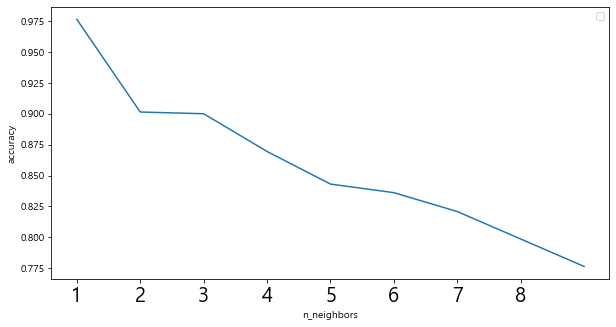

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(len_sc, test_sc)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(1,9,step=1), size=20)
plt.legend()

## 결과

In [ ]:
df_test

,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,...,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
0,3571.132074,2063.226751,0.257267,1.527995,1.372278,1.887114,1.284385,1.969588,3563.848429,2059.582343,...,0.752036,1.933027,3567.172213,2062.192566,0.645611,2.738938,0.854316,2.126324,1.051305,1.956085
1,3571.221735,2063.585495,0.314984,1.143122,0.354754,2.047427,1.140930,2.048862,3563.760177,2059.962074,...,0.923015,1.848965,3567.675066,2062.798366,0.594246,2.636679,1.405469,2.005621,0.915126,2.013492
2,3570.901856,2063.469245,0.616505,1.495963,0.353110,1.863177,1.261060,1.954234,3563.873846,2060.047481,...,0.937406,1.706563,3566.008884,2061.606459,1.791973,2.558481,1.104614,1.419661,1.206172,1.954292
3,3571.193635,2064.239034,0.850664,1.574118,0.475621,2.167718,1.400486,1.913044,3563.658311,2059.972214,...,0.712391,1.735385,3566.969082,2061.984654,1.509754,2.501633,0.881439,1.710077,1.243985,2.142467
4,3571.566352,2063.991771,0.435727,1.932264,0.426083,1.461616,1.585798,2.219166,3563.426994,2058.825317,...,0.911967,1.688752,3568.059218,2061.971563,0.969511,3.240492,0.525513,1.290403,1.218280,2.218954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,3572.183440,2063.784708,1.229472,2.118878,0.554802,1.531674,1.515939,2.064786,3564.057879,2058.876755,...,1.347489,1.589724,3568.988084,2063.376781,0.731822,1.842909,0.271320,1.235039,1.081958,2.239726
476,3571.739312,2062.870495,1.131872,2.143829,0.600867,2.161191,1.481767,1.981241,3564.245318,2060.200322,...,1.269081,1.474497,3569.102041,2063.103722,0.914127,2.014998,0.249743,1.573777,1.254084,2.494333
477,3571.184751,2063.216128,1.139433,2.066175,0.613243,2.005979,1.202326,1.918536,3564.496395,2060.375345,...,1.233228,1.539265,3569.136435,2063.114849,0.982602,2.111638,0.943919,1.525629,1.244487,2.555489
478,3570.595817,2062.900476,1.013536,1.579048,0.214779,1.701602,1.314499,1.782709,3564.497194,2059.990906,...,1.138962,1.475072,3567.959877,2062.375466,1.036738,2.004392,1.395303,1.550127,1.095299,2.372722


In [ ]:
test_scaled = scaler.fit_transform(df_test)
test_scaled = pd.DataFrame(test_scaled, columns=df_test.columns)
test_scaled

,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,...,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
0,0.295893,-0.310652,-1.628697,-0.755427,1.539492,-0.023543,-0.230941,-0.949314,0.380816,0.177067,...,-1.598880,0.115577,-1.302016,-0.501812,-0.544914,0.841095,0.110401,0.336218,-0.679369,-0.782977
1,0.362019,0.030460,-1.482819,-1.270635,-1.129269,0.249974,-0.873498,-0.568732,0.311181,0.467589,...,-1.013776,-0.129243,-0.948244,0.027437,-0.672838,0.709724,1.575743,0.098898,-1.360802,-0.544763
2,0.126107,-0.080076,-0.720738,-0.798307,-1.133579,-0.064383,-0.335420,-1.023026,0.400872,0.532932,...,-0.964527,-0.543971,-2.120451,-1.013855,2.310106,0.609264,0.775863,-1.053183,0.095581,-0.790419
3,0.341295,0.651878,-0.128913,-0.693685,-0.812258,0.455210,0.289089,-1.220770,0.230803,0.475347,...,-1.734548,-0.460032,-1.444924,-0.683451,1.607237,0.536231,0.182513,-0.482183,0.284796,-0.009571
4,0.616174,0.416768,-1.177648,-0.214255,-0.942188,-0.749505,1.119130,0.248860,0.048281,-0.402114,...,-1.051582,-0.595845,-0.677982,-0.694888,0.261761,1.485440,-0.763783,-1.307323,0.156171,0.307817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1.071278,0.219882,0.828506,0.035554,-0.604583,-0.629975,0.806220,-0.492288,0.546084,-0.362760,...,0.438806,-0.884251,-0.024498,0.532760,-0.330204,-0.310029,-1.439601,-1.416177,-0.525982,0.394012
476,0.743732,-0.649398,0.581827,0.068954,-0.483764,0.444073,0.653158,-0.893369,0.693984,0.649866,...,0.170486,-1.219836,0.055674,0.294206,0.123827,-0.088946,-1.496968,-0.750169,0.335332,1.450524
477,0.334743,-0.320752,0.600936,-0.034997,-0.451305,0.179259,-0.598495,-1.194402,0.892097,0.783772,...,0.047797,-1.031206,0.079871,0.303927,0.294364,0.035207,0.348625,-0.844836,0.287310,1.704295
478,-0.099597,-0.620890,0.282737,-0.687085,-1.496394,-0.340053,-0.096057,-1.846478,0.892727,0.489647,...,-0.274788,-1.218162,-0.747871,-0.342024,0.429191,-0.102572,1.548712,-0.796669,-0.459226,0.945889


In [ ]:
df_test["pred_class"]=knn.predict(test_scaled)

In [ ]:
df_test

,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,...,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m,pred_class
0,3571.132074,2063.226751,0.257267,1.527995,1.372278,1.887114,1.284385,1.969588,3563.848429,2059.582343,...,1.933027,3567.172213,2062.192566,0.645611,2.738938,0.854316,2.126324,1.051305,1.956085,0
1,3571.221735,2063.585495,0.314984,1.143122,0.354754,2.047427,1.140930,2.048862,3563.760177,2059.962074,...,1.848965,3567.675066,2062.798366,0.594246,2.636679,1.405469,2.005621,0.915126,2.013492,0
2,3570.901856,2063.469245,0.616505,1.495963,0.353110,1.863177,1.261060,1.954234,3563.873846,2060.047481,...,1.706563,3566.008884,2061.606459,1.791973,2.558481,1.104614,1.419661,1.206172,1.954292,1
3,3571.193635,2064.239034,0.850664,1.574118,0.475621,2.167718,1.400486,1.913044,3563.658311,2059.972214,...,1.735385,3566.969082,2061.984654,1.509754,2.501633,0.881439,1.710077,1.243985,2.142467,0
4,3571.566352,2063.991771,0.435727,1.932264,0.426083,1.461616,1.585798,2.219166,3563.426994,2058.825317,...,1.688752,3568.059218,2061.971563,0.969511,3.240492,0.525513,1.290403,1.218280,2.218954,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,3572.183440,2063.784708,1.229472,2.118878,0.554802,1.531674,1.515939,2.064786,3564.057879,2058.876755,...,1.589724,3568.988084,2063.376781,0.731822,1.842909,0.271320,1.235039,1.081958,2.239726,0
476,3571.739312,2062.870495,1.131872,2.143829,0.600867,2.161191,1.481767,1.981241,3564.245318,2060.200322,...,1.474497,3569.102041,2063.103722,0.914127,2.014998,0.249743,1.573777,1.254084,2.494333,0
477,3571.184751,2063.216128,1.139433,2.066175,0.613243,2.005979,1.202326,1.918536,3564.496395,2060.375345,...,1.539265,3569.136435,2063.114849,0.982602,2.111638,0.943919,1.525629,1.244487,2.555489,1
478,3570.595817,2062.900476,1.013536,1.579048,0.214779,1.701602,1.314499,1.782709,3564.497194,2059.990906,...,1.475072,3567.959877,2062.375466,1.036738,2.004392,1.395303,1.550127,1.095299,2.372722,1


In [ ]:
# KNN으로 예측한 subject_A
df_test["pred_class"].value_counts()

0    195
2    149
1    136
Name: pred_class, dtype: int64